<div id="top" style="padding-top:5px">
    <h3>Applied Data Science</h3>
    <h1>Capstone Project - The Battle of the Neighborhoods (Week 2)</h1>
    <div style="padding-top:15px"></div>
    <small style="color:indigo;"><b>Coursera - IBM Data Science Professional Certificate</b><small>
</div>

### Table of Contents
* <a style="text-decoration:none" href="#introduction">Introduction - Business Problem</a>
* <a style="text-decoration:none" href="#data">Data</a>
* <a style="text-decoration:none" href="#load-explore-data">Load and Explore NYC Data</a>
* <a style="text-decoration:none" href="#methodology">Methodology</a>
* <a style="text-decoration:none" href="#results">Results</a>
* <a style="text-decoration:none" href="#discussion">Discussion</a>
* <a style="text-decoration:none" href="#conslusion">Conclusion</a>

<div id="introduction">
    <h3>Introduction - Business Problem</h3>
</div>
<small><a href="#top" style="text-decoration:none;color:indigo">[Back to Top]</a></small>

<div id="intro-text" style="float:left;width:65%;text-align:justify;padding-left:15px;list-style:none;">
&#9687;<li style="padding-left:5px;">In this capstone project we will try to <b>find a suitable location for a supermarket</b> in Brooklyn, in the City of New York in the United States. The New York City is the most populous city in the United States and provides a lot of business opportunities. New York City consists of five boroughs, each of which is a separate county of the State of New York. The five boroughs – Brooklyn, Queens, Manhattan, The Bronx, and Staten Island.</li>
<br>
&#9687;<li style="padding-left:5px;">This project is aimed at those individuals and business groups who are <b>interested to invest in opening a supermarket in Brooklyn</b>, New York City.</li>    
<br>
&#9687;<li style="padding-left:5px;">What is a <b>Supermarket</b>? A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections and shelves. With the increase in the population, the demand and availability of essential resources like food and other households increase and supermarkets serve this very purpose of providing these resources under one roof.</li>
</div>
<div id="intro-image" style="float:right;width:35%;padding-top:15px;">
    <img src="https://i.imgur.com/jG2v0w7.png" width=300>
</div>

<div id="data" style="padding-top:5px;">
    <h3>Data</h3>
</div>
<small><a href="#top" style="color:indigo">[Back to Top]</a></small>

1. **New York City Dataset:**<br>
This dataset contains data of the 5 boroughs and the neighborhoods that exist in each borough along with the latitude and logitude coordinates of each neighborhood.<br>
**Link:** <a href="https://geo.nyu.edu/catalog/nyu_2451_34572" style="text-decoration:none">New York City Dataset</a>
<br><br>
2. **Supermarket Data:**<br>
Information about the existing supermarkets in Brooklyn, New York City, like number of supermarkets in a neighborhood and their location etc. will be obtained from the **Foursquare API**.<br><br>
3. **Population Data:**<br>
Population dataset for each Brooklyn neighborhood was created by finding the population of each neighborhood individually from the web.

<div id="load-explore-data" style="padding-top:5px">
    <h3>Load and Explore the NYC Data</h3>
</div>
<small><a style="text-decoration:none;color:indigo;" href="#top">[Back to Top]</a></small>

<div id="import-libraries">
    <h4>Import all the required libraries</h4>
</div>

In [1]:
# Library to work with the datasets and perform data analysis
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 250)

# Library to work with arrays and perform scientific computing
import numpy as np

# Library to set the visibilty of generated warnings
import warnings

# Library to handle requests
import requests

# Library to handle CSV files
import csv

# Library to handle JSON files
import json

# Library to download files from servers
#!conda install -c conda-forge wget --yes
import wget

# Library to obtain the Longitude & Latitude values for a given address
from geopy.geocoders import Nominatim

# Library to render maps
import folium

# Library to perform data visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Libraries Imported.')

Libraries Imported.


<div id="get-data">
    <h4>Access dataset</h4>
</div>

In [2]:
url = 'https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json'
filename = wget.download(url)
print('\nData downloaded!')
print('Filename: ', filename)

100% [........................................................] 115774 / 115774
Data downloaded!
Filename:  nyu_2451_34572-geojson.json


**Open the downloaded file and load the data**

In [3]:
with open(filename) as data:
    nyc_data = json.load(data)

In [4]:
nyc_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

From the above cell looking at the json data, we observe that the main data that we need is stored in the '**features**' list of dictionaries. Therefore retrieve a list of Neighborhoods from the **features** key of loaded json file

In [5]:
nyc_neighborhoods = nyc_data['features']

To understand the type and order of neighborhood data in the json file for retrieving specific data for a neighborhood, let's take a look at an instance

In [6]:
nyc_neighborhoods[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

**Transform the *json* data into a *pandas* dataframe**

Since the json data has very poor readability, let's convert the json data into a tabular representation using the pandas library to enhance the readablity and presentation of data

In [7]:
# Create a list containing the names of columns of the dataframe
headers = ['Borough','Neighborhood','Latitude','Longitude']

# Create an empty dataframe
neighborhoods = pd.DataFrame(columns=headers)

Loop through the json data and retreive Borough, Neighborhood, Latitude and Longitude values

In [8]:
# For each feature list in the json file
for nyc_neighborhood in nyc_neighborhoods:
    # Retrieve borough name from 'borough' key in the 'properties' dictionary inside of that feature list
    borough = nyc_neighborhood['properties']['borough']
    # Retrieve neighborhood name from 'name' key in the 'properties' dictionary inside of that feature list
    neighborhood = nyc_neighborhood['properties']['name']
    # Retrieve the Longitude and Latitude values of each Neighborhood
    latitude = nyc_neighborhood['geometry']['coordinates'][1]
    longitude = nyc_neighborhood['geometry']['coordinates'][0]
    # Append the retrieved data into the empty dataframe
    neighborhoods = neighborhoods.append({'Borough':borough,
                                          'Neighborhood':neighborhood,
                                          'Latitude':latitude,
                                          'Longitude':longitude}, ignore_index=True)

In [9]:
# View the first 5 rows of the dataframe
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0  Bronx   Wakefield    40.894705 -73.847201
1  Bronx   Co-op City   40.874294 -73.829939
2  Bronx   Eastchester  40.887556 -73.827806
3  Bronx   Fieldston    40.895437 -73.905643
4  Bronx   Riverdale    40.890834 -73.912585

<div id="methodology" style="padding-top:5px">
    <h3>Methodology</h3>
</div>
<small><a style="text-decoration:none;color:indigo;" href="#top">[Back to Top]</a></small>

Let's check the number of Boroughs and Neighborhoods in the dataset

In [10]:
print('Number of Boroughs: {}'.format(len(neighborhoods['Borough'].unique())))
print('\n=== Borough Names ===')
for num,borough in enumerate(list(neighborhoods['Borough'].unique())):
    print(num+1,'. ',borough)
print('\nTotal Number of Neighborhoods: {}'.format(neighborhoods.shape[0]))
print('\nNumber of neighborhoods in each borough:')
num_of_neighborhoods = neighborhoods.groupby('Borough')['Neighborhood'].nunique().to_frame()
num_of_neighborhoods.reset_index(drop=False, inplace=True)
num_of_neighborhoods.rename(columns={'Neighborhood':'Number of Neighborhoods'}, inplace=True)
num_of_neighborhoods.set_index('Borough', inplace=True)
num_of_neighborhoods.loc['Total Neighborhoods'] = num_of_neighborhoods[['Number of Neighborhoods']].sum(numeric_only=True, axis=0)
num_of_neighborhoods

Number of Boroughs: 5

=== Borough Names ===
1 .  Bronx
2 .  Manhattan
3 .  Brooklyn
4 .  Queens
5 .  Staten Island

Total Number of Neighborhoods: 306

Number of neighborhoods in each borough:


Number of Neighborhoods
Borough                                     
Bronx                52                     
Brooklyn             70                     
Manhattan            40                     
Queens               81                     
Staten Island        63                     
Total Neighborhoods  306

**Obtain the Latitude and Longitude of New York**

In [11]:
address = 'New York, US'
geolocator = Nominatim(user_agent = 'ny_explorer')
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print('The geographical coordinates of New York are\nLatitude: {}\nLongitude: {}'.format(ny_latitude, ny_longitude))

The geographical coordinates of New York are
Latitude: 40.7127281
Longitude: -74.0060152


**Visualize the neighborhoods of New York City using a folium map with neighborhoods superimposed on top**

In [12]:
# Create a folium map instance by passing the new york coordinates and an initial zoom value
ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10, min_zoom=10, max_zoom=10, zoom_control=False)

# Add markers for each neighborhood
for ny_n_lat, ny_n_lon, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label_format = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label_format, parse_html=True)
    folium.CircleMarker(
    [ny_n_lat, ny_n_lon],
    radius=5,
    popup=label,
    color='blue',
    #scrollWheelZoom=False,
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.3,
    parse_html=False).add_to(ny_map)
    
# Print map
ny_map

<img src="https://i.imgur.com/QfD8B0F.png">

**Create a dataframe containing the neighborhoods in Brooklyn**

In [13]:
neighborhoods_copy = neighborhoods.set_index('Borough')
df_brooklyn = neighborhoods_copy.filter(like='Brooklyn', axis=0)
df_brooklyn.reset_index(drop=False, inplace=True)
df_brooklyn.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn  Bay Ridge    40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn  Greenpoint   40.730201 -73.954241
4  Brooklyn  Gravesend    40.595260 -73.973471

Number of neighborhoods in the Brooklyn borough

In [14]:
df_brooklyn.shape[0]

70

Obtain the Latitude and Longitude for Brooklyn, New York

In [15]:
address = 'Brooklyn, NY'
geolocator = Nominatim(user_agent = 'brooklyn_explorer')
location = geolocator.geocode(address)
brooklyn_lat = location.latitude
brooklyn_lon = location.longitude
print('The geographical coordinates of New York are\nLatitude: {}\nLongitude: {}'.format(brooklyn_lat, brooklyn_lon))

The geographical coordinates of New York are
Latitude: 40.6501038
Longitude: -73.9495823


**Visualize the neighborhoods of Brooklyn**

In [16]:
# Create a folium map instance by passing the new york coordinates and an initial zoom value
brooklyn_map = folium.Map(location=[brooklyn_lat, brooklyn_lon], zoom_start=11, min_zoom=11, max_zoom=11, zoom_control=False)

# Add markers for each neighborhood
for brook_lat, brook_lon, borough, neighborhood in zip(df_brooklyn['Latitude'], df_brooklyn['Longitude'], df_brooklyn['Borough'], df_brooklyn['Neighborhood']):
    label_format = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label_format, parse_html=True)
    folium.CircleMarker(
    [brook_lat, brook_lon],
    radius=5,
    popup=label,
    color='black',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.3,
    parse_html=False).add_to(brooklyn_map)
    
# Print map
brooklyn_map

<img src="https://i.imgur.com/SzscTMn.png">

<div>
    <h4>Foursquare API</h4>
</div>

Now that we have our location candidates, let's use Foursquare API to get information on supermarkets in each neighborhood in Brooklyn.

Following cell defines the Foursquare Client Credentials

In [17]:
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxx'
CLIENT_SECRET = '*********************'
VERSION = '****************'

Category ID corresponding to **Supermarket** were taken from Foursquare web site

In [22]:
# Use the category id for supermarket category to retrieve supermarket related information
category_id = '52f2ab2ebcbc57f1066b8b46'

limit = 100
radius = 4000

# Create a list to store supermarket info
supermarket_info = []

for lat, lon, borough, neighborhood in zip(df_brooklyn['Latitude'], df_brooklyn['Longitude'], df_brooklyn['Borough'], df_brooklyn['Neighborhood']):
    # Define a URL to retrieve supermarket info from the Foursquare API
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, lat, lon, category_id, radius, limit)
    
    # Extract the json data from the url
    # The main data that we need is stored in the 'items' key
    brooklyn_info = requests.get(url).json()['response']['groups'][0]['items']
    
    for supermarket in brooklyn_info:
        supermarket_info.append((neighborhood,
                                 lat,
                                 lon,
                                 supermarket['venue']['name'],
                                 #supermarket['venue']['categories'][0]['name'],
                                 supermarket['venue']['location']['lat'],
                                 supermarket['venue']['location']['lng']))

Transform the **supermarket_info** list into a pandas Dataframe

In [23]:
df_brooklyn_sm = pd.DataFrame(data=supermarket_info)
df_brooklyn_sm.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Supermarket Name','Supermarket Latitude','Supermarket Longitude']
print(df_brooklyn_sm.shape)
df_brooklyn_sm.head(10)

(4699, 6)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bay Ridge    40.625801             -74.030621                
1  Bay Ridge    40.625801             -74.030621                
2  Bay Ridge    40.625801             -74.030621                
3  Bay Ridge    40.625801             -74.030621                
4  Bay Ridge    40.625801             -74.030621                
5  Bay Ridge    40.625801             -74.030621                
6  Bay Ridge    40.625801             -74.030621                
7  Bay Ridge    40.625801             -74.030621                
8  Bay Ridge    40.625801             -74.030621                
9  Bay Ridge    40.625801             -74.030621                

           Supermarket Name  Supermarket Latitude  Supermarket Longitude  
0  Met Fresh Supermarket     40.616528            -74.034003              
1  Metropolitan CityMarket   40.617375            -74.030735              
2  CTown Supermarkets        40.629234            -74.022803              
3  Jmart 新世界超市               40.610080            -74.001221              
4  Foodtown                  40.619927            -74.032301              
5  Scaturro Supermarkets     40.629409            -74.005051              
6  Food Dynasty              40.611275            -74.008544              
7  Bingo Wholesale           40.629211            -73.999403              
8  Key Food Fresh & Natural  40.628058            -74.029126              
9  Fei Long Market           40.633397            -74.011286

**Visualize the supermarket venues accross the neighborhoods of Brooklyn**

In [24]:
# Create a folium map instance by passing the new york coordinates and an initial zoom value
supermarket_map = folium.Map(location=[brooklyn_lat, brooklyn_lon], zoom_start=11, min_zoom=11, max_zoom=11, zoom_control=False)

# Add markers for each neighborhood
for sm_lat, sm_lon, sm_name, neighborhood in zip(df_brooklyn_sm['Supermarket Latitude'], df_brooklyn_sm['Supermarket Longitude'], df_brooklyn_sm['Supermarket Name'], df_brooklyn_sm['Neighborhood']):
    label_format = '{}, {}'.format(sm_name, neighborhood)
    label = folium.Popup(label_format, parse_html=True)
    folium.CircleMarker(
    [sm_lat, sm_lon],
    radius=5,
    popup=label,
    color='indigo',
    fill=True,
    fill_color='gold',
    fill_opacity=0.7,
    parse_html=False).add_to(supermarket_map)
    
# Print map
supermarket_map

<img src="https://i.imgur.com/H4H5Upi.png">

**Number of supermarket(s) in each neighborhood in Brooklyn**

In [25]:
# Dataframe with number of Supermarkets in each Neighborhood
df_num_of_sm = df_brooklyn_sm.groupby('Neighborhood')['Supermarket Name'].nunique().to_frame()
df_num_of_sm.reset_index(drop=False, inplace=True)
df_num_of_sm.rename(columns={'Supermarket Name':'Number of Supermarkets'}, inplace=True)
df_num_of_sm

Neighborhood  Number of Supermarkets
0   Bath Beach                 38                    
1   Bay Ridge                  32                    
2   Bedford Stuyvesant         53                    
3   Bensonhurst                50                    
4   Bergen Beach               15                    
5   Boerum Hill                66                    
6   Borough Park               54                    
7   Brighton Beach             28                    
8   Broadway Junction          41                    
9   Brooklyn Heights           65                    
10  Brownsville                40                    
11  Bushwick                   49                    
12  Canarsie                   27                    
13  Carroll Gardens            50                    
14  City Line                  28                    
15  Clinton Hill               63                    
16  Cobble Hill                55                    
17  Coney Island               25                    
18  Crown Heights              48                    
19  Cypress Hills              30                    
20  Ditmas Park                45                    
21  Downtown                   66                    
22  Dumbo                      64                    
23  Dyker Heights              39                    
24  East Flatbush              39                    
25  East New York              29                    
26  East Williamsburg          45                    
27  Erasmus                    46                    
28  Flatbush                   41                    
29  Flatlands                  35                    
..        ...                  ..                    
40  Kensington                 48                    
41  Madison                    41                    
42  Manhattan Beach            20                    
43  Manhattan Terrace          48                    
44  Marine Park                30                    
45  Midwood                    43                    
46  Mill Basin                 21                    
47  Mill Island                15                    
48  New Lots                   29                    
49  North Side                 66                    
50  Ocean Hill                 39                    
51  Ocean Parkway              50                    
52  Paerdegat Basin            22                    
53  Park Slope                 52                    
54  Prospect Heights           53                    
55  Prospect Lefferts Gardens  48                    
56  Prospect Park South        49                    
57  Red Hook                   36                    
58  Remsen Village             40                    
59  Rugby                      45                    
60  Sea Gate                   17                    
61  Sheepshead Bay             28                    
62  South Side                 66                    
63  Starrett City              32                    
64  Sunset Park                39                    
65  Vinegar Hill               64                    
66  Weeksville                 45                    
67  Williamsburg               64                    
68  Windsor Terrace            54                    
69  Wingate                    43                    

[70 rows x 2 columns]

**Visualize the supermarket data using Bar chart**

<BarContainer object of 70 artists>

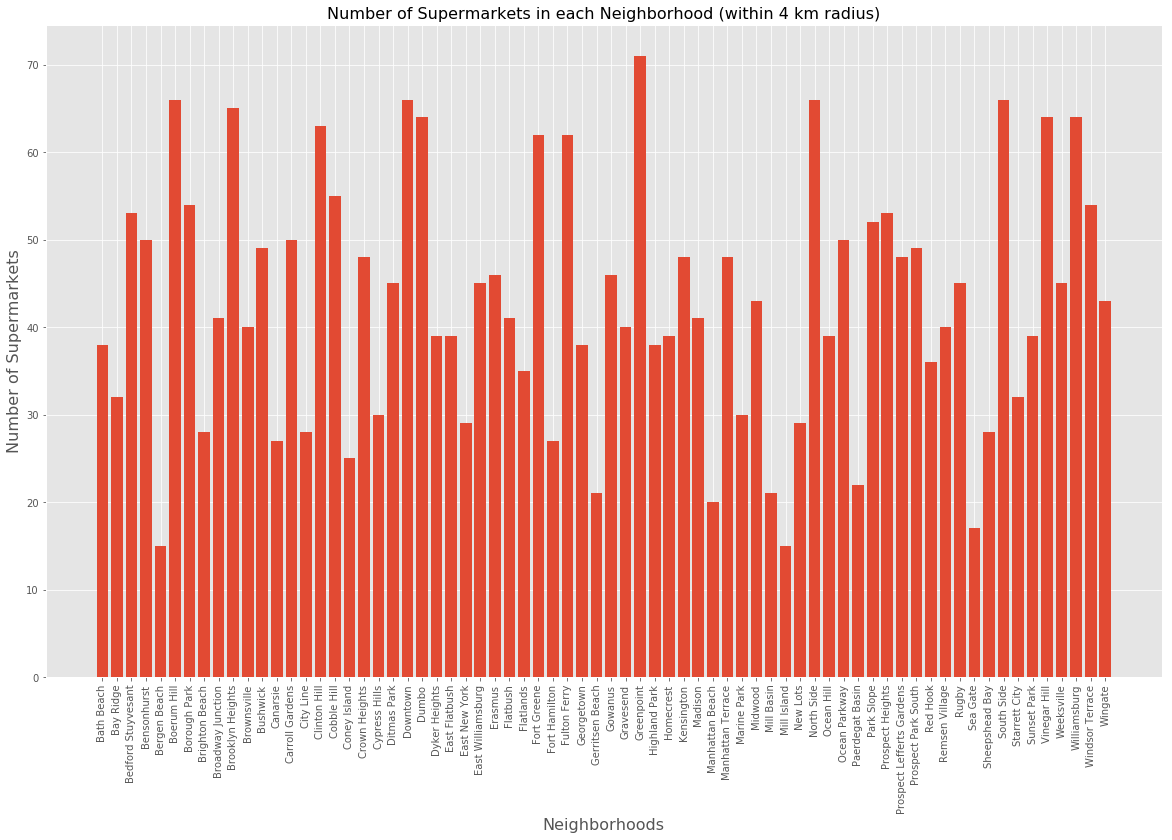

In [26]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods', fontsize=16)
plt.ylabel('Number of Supermarkets', fontsize=16)
plt.title('Number of Supermarkets in each Neighborhood (within 4 km radius)', fontsize=16)
plt.bar(df_num_of_sm['Neighborhood'], df_num_of_sm['Number of Supermarkets'])

In [27]:
# Finding the number of neighborhoods with the a specific number of supermarkets
df_num_of_sm_viz = df_num_of_sm.groupby('Number of Supermarkets')['Neighborhood'].nunique().to_frame()
df_num_of_sm_viz.rename(columns={'Neighborhood':'Number of Neighborhoods'}, inplace=True)
df_num_of_sm_viz

Number of Neighborhoods
Number of Supermarkets                         
15                      2                      
17                      1                      
20                      1                      
21                      2                      
22                      1                      
25                      1                      
27                      2                      
28                      3                      
29                      2                      
30                      2                      
32                      2                      
35                      1                      
36                      1                      
38                      3                      
39                      5                      
40                      3                      
41                      3                      
43                      2                      
45                      4                      
46                      2                      
48                      4                      
49                      2                      
50                      3                      
52                      1                      
53                      2                      
54                      2                      
55                      1                      
62                      2                      
63                      1                      
64                      3                      
65                      1                      
66                      4                      
71                      1

The above dataframe should be read as, for example, the first row means *There are 2 neighborhoods with 15 supermarkets each*.

**Visualize the number of supermarkets in each neighborhood**

In [28]:
# Create a folium map instance by passing the new york coordinates and an initial zoom value
num_supermarket_map = folium.Map(location=[brooklyn_lat, brooklyn_lon], zoom_start=12, min_zoom=12, max_zoom=12, zoom_control=False)

# Specify colors for neighborhoods with different number of supermarkets
def color(num_of_sm):
    if num_of_sm in range(15,31):
        col = 'gray'
    elif num_of_sm in range(31,46):
        col = 'blue'
    else:
        col = 'red'
    return col

#icon = folium.features.CustomIcon('https://i.imgur.com/tUAWSkQ.png', icon_size=(50,50))

# Add markers for each neighborhood with supermarkets
for neigh_lat, neigh_lon, neighborhood, num_sm in zip(df_brooklyn['Latitude'], df_brooklyn['Longitude'], df_num_of_sm['Neighborhood'], df_num_of_sm['Number of Supermarkets']):
    label_format = '{}, {}'.format(num_sm, neighborhood)
    label = folium.Popup(label_format, parse_html=True)
    folium.Marker(
    [neigh_lat, neigh_lon],
    radius=5,
    popup=label,
    icon= folium.Icon(color=color(num_sm),icon_color='yellow',icon='home')).add_to(num_supermarket_map)
    
# Print map
num_supermarket_map

<img src="https://i.imgur.com/CRznk2N.png">

> Neighborhoods with 15 to 30 supermarkets are indicated by gray markers<br>
> Neighborhoods with 31 to 45 supermarkets are indicated by blue markers<br>
> Neighborhoods with 46 or more supermarkets are indicated by red markers<br>

Next, we will create a dataframe that will group all the neighborhoods based on which part of Brooklyn they lie in (ex. northern, southern etc) and we will also add the population counts for each of the neighborhoods.

In [29]:
neighborhoods_popu_list = [['Bath Beach', 'Southwestern Brooklyn', 29931],
['Bay Ridge', 'Southwestern Brooklyn', 79371],
['Bedford Stuyvesant', 'Northern Brooklyn', 158000],
['Bensonhurst', 'Southwestern Brooklyn', 152000],
['Bergen Beach', 'Southern Brooklyn', 45231],
['Boerum Hill', 'Northwestern Brooklyn', 11604],
['Borough Park', 'Southwestern Brooklyn', 106000],
['Brighton Beach', 'Southern Brooklyn', 35547],
['Broadway Junction', 'Northwestern Brooklyn', 2314],
['Brooklyn Heights', 'Northwestern Brooklyn', 20256],
['Brownsville', 'Eastern Brooklyn', 58300],
['Bushwick', 'Northern Brooklyn', 129000],
['Canarsie', 'Eastern Brooklyn', 83693],
['Carroll Gardens', 'Northwestern Brooklyn', 12853],
['City Line', 'Eastern Brooklyn', 18980],
['Clinton Hill', 'Northwestern Brooklyn', 26936],
['Cobble Hill', 'Northwestern Brooklyn', 7589],
['Coney Island', 'Southwestern Brooklyn', 24711],
['Crown Heights', 'Central Brooklyn', 143000],
['Cypress Hills', 'Eastern Brooklyn', 17089],
['Ditmas Park', 'Central Brooklyn', 24714],
['Downtown', 'Northwestern Brooklyn', 7053],
['Dumbo', 'Northwestern Brooklyn', 1139],
['Dyker Heights', 'Southwestern Brooklyn', 42419],
['East Flatbush', 'Central Brooklyn', 136000],
['East New York', 'Eastern Brooklyn', 179932],
['East Williamsburg', 'Northern Brooklyn', 150713],
['Erasmus', 'Central Brooklyn', 170000],
['Flatbush', 'Central Brooklyn', 105804],
['Flatlands', 'Southern Brooklyn', 64762],
['Fort Greene', 'Northwestern Brooklyn', 28335],
['Fort Hamilton', 'Southwestern Brooklyn', 28653],
['Fulton Ferry', 'Northwestern Brooklyn', 239],
['Georgetown', 'Southern Brooklyn', 47027],
['Gerritsen Beach', 'Southern Brooklyn', 85776],
['Gowanus', 'Northwestern Brooklyn', 22919],
['Gravesend', 'Southern Brooklyn', 29436],
['Greenpoint', 'Northern Brooklyn', 34719],
['Highland Park', 'Eastern Brooklyn', 31968],
['Homecrest', 'Southern Brooklyn', 44316],
['Kensington', 'Central Brooklyn', 42214],
['Madison', 'Southern Brooklyn', 85776],
['Manhattan Beach', 'Southern Brooklyn', 80222],
['Manhattan Terrace', 'Southern Brooklyn', 51660],
['Marine Park', 'Southern Brooklyn', 45231],
['Midwood', 'Central Brooklyn', 52835],
['Mill Basin', 'Southern Brooklyn', 45231],
['Mill Island', 'Southern Brooklyn', 16661],
['New Lots', 'Eastern Brooklyn', 47936],
['North Side', 'Northern Brooklyn', 8131],
['Ocean Hill', 'Northern Brooklyn', 74982],
['Ocean Parkway', 'Central Brooklyn', 47704],
['Paerdegat Basin', 'Southern Brooklyn', 20013],
['Park Slope', 'Northwestern Brooklyn', 67645],
['Prospect Heights', 'Northwestern Brooklyn', 22596],
['Prospect Lefferts Gardens', 'Central Brooklyn', 99287],
['Prospect Park South', 'Central Brooklyn', 19214],
['Red Hook', 'Northwestern Brooklyn', 37680],
['Remsen Village', 'Central Brooklyn', 59155],
['Rugby', 'Central Brooklyn', 135619],
['Sea Gate', 'Southern Brooklyn', 45244],
['Sheepshead Bay', 'Southern Brooklyn', 63561],
['South Side', 'Southern Brooklyn', 153644],
['Starrett City', 'Eastern Brooklyn', 12822],
['Sunset Park', 'Southwestern Brooklyn', 126000],
['Vinegar Hill', 'Northwestern Brooklyn', 2671],
['Weeksville', 'Central Brooklyn', 35999],
['Williamsburg', 'Northern Brooklyn', 150713],
['Windsor Terrace', 'Central Brooklyn', 20988],
['Wingate', 'Central Brooklyn', 104858]]

Convert the above list data into a pandas Dataframe

In [30]:
df_portion_population = pd.DataFrame(data=neighborhoods_popu_list)
df_portion_population.rename(columns={0:'Neighborhood', 1:'Portion of Borough', 2:'Population'}, inplace=True)
df_portion_population.head()

Neighborhood     Portion of Borough  Population
0  Bath Beach          Southwestern Brooklyn  29931     
1  Bay Ridge           Southwestern Brooklyn  79371     
2  Bedford Stuyvesant  Northern Brooklyn      158000    
3  Bensonhurst         Southwestern Brooklyn  152000    
4  Bergen Beach        Southern Brooklyn      45231

Join the above **df_portion_population** dataframe with the **df_num_of_sm** dataframe so that we have portion of borough, population and number of supermarkets for each neighborhood in one dataframe

In [31]:
df_sm_portion_population = df_portion_population.join(df_num_of_sm.set_index('Neighborhood'), on='Neighborhood')
df_sm_portion_population

Neighborhood     Portion of Borough  Population  \
0   Bath Beach                 Southwestern Brooklyn  29931        
1   Bay Ridge                  Southwestern Brooklyn  79371        
2   Bedford Stuyvesant         Northern Brooklyn      158000       
3   Bensonhurst                Southwestern Brooklyn  152000       
4   Bergen Beach               Southern Brooklyn      45231        
5   Boerum Hill                Northwestern Brooklyn  11604        
6   Borough Park               Southwestern Brooklyn  106000       
7   Brighton Beach             Southern Brooklyn      35547        
8   Broadway Junction          Northwestern Brooklyn  2314         
9   Brooklyn Heights           Northwestern Brooklyn  20256        
10  Brownsville                Eastern Brooklyn       58300        
11  Bushwick                   Northern Brooklyn      129000       
12  Canarsie                   Eastern Brooklyn       83693        
13  Carroll Gardens            Northwestern Brooklyn  12853        
14  City Line                  Eastern Brooklyn       18980        
15  Clinton Hill               Northwestern Brooklyn  26936        
16  Cobble Hill                Northwestern Brooklyn  7589         
17  Coney Island               Southwestern Brooklyn  24711        
18  Crown Heights              Central Brooklyn       143000       
19  Cypress Hills              Eastern Brooklyn       17089        
20  Ditmas Park                Central Brooklyn       24714        
21  Downtown                   Northwestern Brooklyn  7053         
22  Dumbo                      Northwestern Brooklyn  1139         
23  Dyker Heights              Southwestern Brooklyn  42419        
24  East Flatbush              Central Brooklyn       136000       
25  East New York              Eastern Brooklyn       179932       
26  East Williamsburg          Northern Brooklyn      150713       
27  Erasmus                    Central Brooklyn       170000       
28  Flatbush                   Central Brooklyn       105804       
29  Flatlands                  Southern Brooklyn      64762        
..        ...                                ...        ...        
40  Kensington                 Central Brooklyn       42214        
41  Madison                    Southern Brooklyn      85776        
42  Manhattan Beach            Southern Brooklyn      80222        
43  Manhattan Terrace          Southern Brooklyn      51660        
44  Marine Park                Southern Brooklyn      45231        
45  Midwood                    Central Brooklyn       52835        
46  Mill Basin                 Southern Brooklyn      45231        
47  Mill Island                Southern Brooklyn      16661        
48  New Lots                   Eastern Brooklyn       47936        
49  North Side                 Northern Brooklyn      8131         
50  Ocean Hill                 Northern Brooklyn      74982        
51  Ocean Parkway              Central Brooklyn       47704        
52  Paerdegat Basin            Southern Brooklyn      20013        
53  Park Slope                 Northwestern Brooklyn  67645        
54  Prospect Heights           Northwestern Brooklyn  22596        
55  Prospect Lefferts Gardens  Central Brooklyn       99287        
56  Prospect Park South        Central Brooklyn       19214        
57  Red Hook                   Northwestern Brooklyn  37680        
58  Remsen Village             Central Brooklyn       59155        
59  Rugby                      Central Brooklyn       135619       
60  Sea Gate                   Southern Brooklyn      45244        
61  Sheepshead Bay             Southern Brooklyn      63561        
62  South Side                 Southern Brooklyn      153644       
63  Starrett City              Eastern Brooklyn       12822        
64  Sunset Park                Southwestern Brooklyn  126000       
65  Vinegar Hill               Northwestern Brooklyn  2671         
66  Weeksville                 Central Brooklyn       35999        
67  W

Different Portions in the Brooklyn borough

In [32]:
df_sm_portion_population['Portion of Borough'].unique()

array(['Southwestern Brooklyn', 'Northern Brooklyn', 'Southern Brooklyn',
       'Northwestern Brooklyn', 'Eastern Brooklyn', 'Central Brooklyn'],
      dtype=object)

Now we will divide the dataframe **df_sm_portion_population** into 6 different portions in accordance to the 6 unique portions of Brooklyn borough

**Central Brooklyn Neighborhoods**

In [33]:
central_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_central_brooklyn = central_brooklyn_neighborhoods.filter(like='Central Brooklyn', axis=0)
df_central_brooklyn.reset_index(drop=False, inplace=True)
df_central_brooklyn

Portion of Borough               Neighborhood  Population  \
0   Central Brooklyn   Crown Heights              143000       
1   Central Brooklyn   Ditmas Park                24714        
2   Central Brooklyn   East Flatbush              136000       
3   Central Brooklyn   Erasmus                    170000       
4   Central Brooklyn   Flatbush                   105804       
5   Central Brooklyn   Kensington                 42214        
6   Central Brooklyn   Midwood                    52835        
7   Central Brooklyn   Ocean Parkway              47704        
8   Central Brooklyn   Prospect Lefferts Gardens  99287        
9   Central Brooklyn   Prospect Park South        19214        
10  Central Brooklyn   Remsen Village             59155        
11  Central Brooklyn   Rugby                      135619       
12  Central Brooklyn   Weeksville                 35999        
13  Central Brooklyn   Windsor Terrace            20988        
14  Central Brooklyn   Wingate                    104858       

    Number of Supermarkets  
0   48                      
1   45                      
2   39                      
3   46                      
4   41                      
5   48                      
6   43                      
7   50                      
8   48                      
9   49                      
10  40                      
11  45                      
12  45                      
13  54                      
14  43

**Eastern Brooklyn Neighborhoods**

In [34]:
eastern_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_eastern_brooklyn = eastern_brooklyn_neighborhoods.filter(like='Eastern Brooklyn', axis=0)
df_eastern_brooklyn.reset_index(drop=False, inplace=True)
df_eastern_brooklyn

Portion of Borough   Neighborhood  Population  Number of Supermarkets
0  Eastern Brooklyn   Brownsville    58300       40                    
1  Eastern Brooklyn   Canarsie       83693       27                    
2  Eastern Brooklyn   City Line      18980       28                    
3  Eastern Brooklyn   Cypress Hills  17089       30                    
4  Eastern Brooklyn   East New York  179932      29                    
5  Eastern Brooklyn   Highland Park  31968       38                    
6  Eastern Brooklyn   New Lots       47936       29                    
7  Eastern Brooklyn   Starrett City  12822       32

**Northern Brooklyn Neighborhoods**

In [35]:
northern_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_northern_brooklyn = northern_brooklyn_neighborhoods.filter(like='Northern Brooklyn', axis=0)
df_northern_brooklyn.reset_index(drop=False, inplace=True)
df_northern_brooklyn

Portion of Borough        Neighborhood  Population  Number of Supermarkets
0  Northern Brooklyn  Bedford Stuyvesant  158000      53                    
1  Northern Brooklyn  Bushwick            129000      49                    
2  Northern Brooklyn  East Williamsburg   150713      45                    
3  Northern Brooklyn  Greenpoint          34719       71                    
4  Northern Brooklyn  North Side          8131        66                    
5  Northern Brooklyn  Ocean Hill          74982       39                    
6  Northern Brooklyn  Williamsburg        150713      64

**Northwestern Brooklyn Neighborhoods**

In [36]:
northwestern_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_northwestern_brooklyn = northwestern_brooklyn_neighborhoods.filter(like='Northwestern Brooklyn', axis=0)
df_northwestern_brooklyn.reset_index(drop=False, inplace=True)
df_northwestern_brooklyn

Portion of Borough       Neighborhood  Population  \
0   Northwestern Brooklyn  Boerum Hill        11604        
1   Northwestern Brooklyn  Broadway Junction  2314         
2   Northwestern Brooklyn  Brooklyn Heights   20256        
3   Northwestern Brooklyn  Carroll Gardens    12853        
4   Northwestern Brooklyn  Clinton Hill       26936        
5   Northwestern Brooklyn  Cobble Hill        7589         
6   Northwestern Brooklyn  Downtown           7053         
7   Northwestern Brooklyn  Dumbo              1139         
8   Northwestern Brooklyn  Fort Greene        28335        
9   Northwestern Brooklyn  Fulton Ferry       239          
10  Northwestern Brooklyn  Gowanus            22919        
11  Northwestern Brooklyn  Park Slope         67645        
12  Northwestern Brooklyn  Prospect Heights   22596        
13  Northwestern Brooklyn  Red Hook           37680        
14  Northwestern Brooklyn  Vinegar Hill       2671         

    Number of Supermarkets  
0   66                      
1   41                      
2   65                      
3   50                      
4   63                      
5   55                      
6   66                      
7   64                      
8   62                      
9   62                      
10  46                      
11  52                      
12  53                      
13  36                      
14  64

**Southern Brooklyn Neighborhoods**

In [37]:
southern_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_southern_brooklyn = southern_brooklyn_neighborhoods.filter(like='Southern Brooklyn', axis=0)
df_southern_brooklyn.reset_index(drop=False, inplace=True)
df_southern_brooklyn

Portion of Borough       Neighborhood  Population  Number of Supermarkets
0   Southern Brooklyn  Bergen Beach       45231       15                    
1   Southern Brooklyn  Brighton Beach     35547       28                    
2   Southern Brooklyn  Flatlands          64762       35                    
3   Southern Brooklyn  Georgetown         47027       38                    
4   Southern Brooklyn  Gerritsen Beach    85776       21                    
5   Southern Brooklyn  Gravesend          29436       40                    
6   Southern Brooklyn  Homecrest          44316       39                    
7   Southern Brooklyn  Madison            85776       41                    
8   Southern Brooklyn  Manhattan Beach    80222       20                    
9   Southern Brooklyn  Manhattan Terrace  51660       48                    
10  Southern Brooklyn  Marine Park        45231       30                    
11  Southern Brooklyn  Mill Basin         45231       21                    
12  Southern Brooklyn  Mill Island        16661       15                    
13  Southern Brooklyn  Paerdegat Basin    20013       22                    
14  Southern Brooklyn  Sea Gate           45244       17                    
15  Southern Brooklyn  Sheepshead Bay     63561       28                    
16  Southern Brooklyn  South Side         153644      66

**Southwestern Brooklyn Neighborhoods**

In [38]:
southwestern_brooklyn_neighborhoods = df_sm_portion_population.set_index('Portion of Borough')
df_southwestern_brooklyn = southwestern_brooklyn_neighborhoods.filter(like='Southwestern Brooklyn', axis=0)
df_southwestern_brooklyn.reset_index(drop=False, inplace=True)
df_southwestern_brooklyn

Portion of Borough   Neighborhood  Population  Number of Supermarkets
0  Southwestern Brooklyn  Bath Beach     29931       38                    
1  Southwestern Brooklyn  Bay Ridge      79371       32                    
2  Southwestern Brooklyn  Bensonhurst    152000      50                    
3  Southwestern Brooklyn  Borough Park   106000      54                    
4  Southwestern Brooklyn  Coney Island   24711       25                    
5  Southwestern Brooklyn  Dyker Heights  42419       39                    
6  Southwestern Brooklyn  Fort Hamilton  28653       27                    
7  Southwestern Brooklyn  Sunset Park    126000      39

**Analyze the 6 portions of the Brooklyn Neighborhoods**

**Central Brooklyn**

In [39]:
number_of_neighborhoods_central = df_central_brooklyn.shape[0]
total_sm_central = df_central_brooklyn['Number of Supermarkets'].sum()
total_population_central = df_central_brooklyn['Population'].sum()
score_central = total_population_central/total_sm_central

**Eastern Brooklyn**

In [40]:
number_of_neighborhoods_eastern = df_eastern_brooklyn.shape[0]
total_sm_eastern = df_eastern_brooklyn['Number of Supermarkets'].sum()
total_population_eastern = df_eastern_brooklyn['Population'].sum()
score_eastern = total_population_eastern/total_sm_eastern

**Northern Brooklyn**

In [41]:
number_of_neighborhoods_northern = df_northern_brooklyn.shape[0]
total_sm_northern = df_northern_brooklyn['Number of Supermarkets'].sum()
total_population_northern = df_northern_brooklyn['Population'].sum()
score_northern = total_population_northern/total_sm_northern

**Northwestern Brooklyn**

In [42]:
number_of_neighborhoods_northwestern = df_northwestern_brooklyn.shape[0]
total_sm_northwestern = df_northwestern_brooklyn['Number of Supermarkets'].sum()
total_population_northwestern = df_northwestern_brooklyn['Population'].sum()
score_northwestern = total_population_northwestern/total_sm_northwestern

**Southern Brooklyn**

In [43]:
number_of_neighborhoods_southern = df_southern_brooklyn.shape[0]
total_sm_southern = df_southern_brooklyn['Number of Supermarkets'].sum()
total_population_southern = df_southern_brooklyn['Population'].sum()
score_southern = total_population_southern/total_sm_southern

**Southwestern Brooklyn**

In [44]:
number_of_neighborhoods_southwestern = df_southwestern_brooklyn.shape[0]
total_sm_southwestern = df_southwestern_brooklyn['Number of Supermarkets'].sum()
total_population_southwestern = df_southwestern_brooklyn['Population'].sum()
score_southwestern = total_population_southwestern/total_sm_southwestern

<div id="results" style="padding-top:5px">
    <h3>Results</h3>
</div>
<small><a style="text-decoration:none;color:indigo;" href="#top">[Back to Top]</a></small>

After partitioning Brooklyn borough into 6 portions, we have made the following observation in terms of the **total number of supermarkets** and the **total population** in each borough portion and a ***score*** that will help in finding an optimal location to open a supermarket

Portion 1: **Central Brooklyn**

In [45]:
print('Number of neighborhoods in Central Brooklyn: {}'.format(number_of_neighborhoods_central))
print('Total number of supermarkets in Central Brooklyn: {}'.format(total_sm_central))
print('Total population in Central Brooklyn: {}'.format(total_population_central))
print('Score: {:.0f}'.format(score_central))

Number of neighborhoods in Central Brooklyn: 15
Total number of supermarkets in Central Brooklyn: 684
Total population in Central Brooklyn: 1197391
Score: 1751


Portion 2: **Eastern Brooklyn**

In [46]:
print('Number of neighborhoods in Eastern Brooklyn: {}'.format(number_of_neighborhoods_eastern))
print('Total number of supermarkets in Eastern Brooklyn: {}'.format(total_sm_eastern))
print('Total population in Eastern Brooklyn: {}'.format(total_population_eastern))
print('Score: {:.0f}'.format(score_eastern))

Number of neighborhoods in Eastern Brooklyn: 8
Total number of supermarkets in Eastern Brooklyn: 253
Total population in Eastern Brooklyn: 450720
Score: 1782


Portion 3: **Northern Brooklyn**

In [47]:
print('Number of neighborhoods in Northern Brooklyn: {}'.format(number_of_neighborhoods_northern))
print('Total number of supermarkets in Northern Brooklyn: {}'.format(total_sm_northern))
print('Total population in Northern Brooklyn: {}'.format(total_population_northern))
print('Score: {:.0f}'.format(score_northern))

Number of neighborhoods in Northern Brooklyn: 7
Total number of supermarkets in Northern Brooklyn: 387
Total population in Northern Brooklyn: 706258
Score: 1825


Portion 4: **Northwestern Brooklyn**

In [48]:
print('Number of neighborhoods in Northwestern Brooklyn: {}'.format(number_of_neighborhoods_northwestern))
print('Total number of supermarkets in Northwestern Brooklyn: {}'.format(total_sm_northwestern))
print('Total population in Northwestern Brooklyn: {}'.format(total_population_northwestern))
print('Score: {:.0f}'.format(score_northwestern))

Number of neighborhoods in Northwestern Brooklyn: 15
Total number of supermarkets in Northwestern Brooklyn: 845
Total population in Northwestern Brooklyn: 271829
Score: 322


Portion 5: **Southern Brooklyn**

In [49]:
print('Number of neighborhoods in Southern Brooklyn: {}'.format(number_of_neighborhoods_southern))
print('Total number of supermarkets in Southern Brooklyn: {}'.format(total_sm_southern))
print('Total population in Southern Brooklyn: {}'.format(total_population_southern))
print('Score: {:.0f}'.format(score_southern))

Number of neighborhoods in Southern Brooklyn: 17
Total number of supermarkets in Southern Brooklyn: 524
Total population in Southern Brooklyn: 959338
Score: 1831


Portion 6: **Southwestern Brooklyn**

In [50]:
print('Number of neighborhoods in Southwestern Brooklyn: {}'.format(number_of_neighborhoods_southwestern))
print('Total number of supermarkets in Southwestern Brooklyn: {}'.format(total_sm_southwestern))
print('Total population in Southwestern Brooklyn: {}'.format(total_population_southwestern))
print('Score: {:.0f}'.format(score_southwestern))

Number of neighborhoods in Southwestern Brooklyn: 8
Total number of supermarkets in Southwestern Brooklyn: 304
Total population in Southwestern Brooklyn: 589085
Score: 1938


<div id="discussion" style="padding-top:5px">
    <h3>Discussion</h3>
</div>
<small><a style="text-decoration:none;color:indigo;" href="#top">[Back to Top]</a></small>

In the results section above, we had calculated scores for all the 6 portions of the borough. This score is obtained by dividing the ***total population in a portion*** by ***total number of supermarkets in that portion***.<br><br>
**What is the significance this score?**<br>
- A **lower** score, indicates that *there are sufficient number of supermarkets for the present population*.<br><br>
- A **higher** score siginifies that *there are lesser number of supermarkets compared to the population of the portion*.

Based on the analysis of each portion, we note that:<br>
* **Portion 4 - Northwestern Brooklyn** has the lowest score. (means there is more business competition among the supermarkets)<br><br>
* **Portion 6 - Southwestern Brooklyn** has the highest score. (means there is not much business competition)<br><br>
* **Portion 1 - Central Brooklyn** has the highest population of **1197391 (1.2 million approx.)** (means higher customer expectancy)

Therefore, the individual or the business group interested in investing in opening a supermarket in the Brooklyn borough **can invest in Northwestern Brooklyn where there is much more comptetion in the supermarket business or can invest in Central Brooklyn where there is the highest population of all the 6 portions**.

<div id="conslusion" style="padding-top:5px">
    <h3>Conclusion</h3>
</div>
<small><a style="text-decoration:none;color:indigo;" href="#top">[Back to Top]</a></small>

The results of this capstone project are obtained by performing analysis on limited data. The purpose of this project was to find an optimal and suitable location for opening a supermarket in the Brooklyn borough in order to aid stakeholders with best locations that could benefit the business and the growth of the brand. If a neighborhood or location has a high density of supermarkets, then it means that there is a high demand in those locations. Also locations with larger population will need more supermarkets in order to cater their needs. The final decision on selection of an optimal location will be taken by the stakeholders based on characteristics such as popularity of the location and proximity to major roads etc.